# The Sparks Foundation Data Science and Business Analytics

# Task 3: Perform 'Exploratory Data Analytics-Retail' on dataset 'SampleSuperstore'.


# by Arjun dey


# 1.) Importing Libraries

In [122]:
#Importing required libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [123]:
#Importing dataset SampleSuperstore
data = pd.read_csv("SampleSuperstore.csv")

In [124]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [125]:
data.shape

(9994, 13)

In [126]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [127]:
data.iloc[0:3,0:2]

,Ship Mode,Segment
0,Second Class,Consumer
1,Second Class,Consumer
2,Second Class,Corporate


# step-2 Data Cleaning - Removing null values, removing duplicate values Checking null values

In [128]:
#To check null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [129]:
#Checking data types
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [130]:
#Renaming the column names
data = data.rename(columns={"Postal Code": "Code","Sub-Category":"Sub_Cat"})
data.head()

,Ship Mode,Segment,Country,City,State,Code,Region,Category,Sub_Cat,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [131]:
data.shape

(9994, 13)

In [132]:
#Rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows_data.shape)

Number of duplicate rows: (17, 13)


In [133]:
data.count()

Ship Mode    9994
Segment      9994
Country      9994
City         9994
State        9994
Code         9994
Region       9994
Category     9994
Sub_Cat      9994
Sales        9994
Quantity     9994
Discount     9994
Profit       9994
dtype: int64

In [134]:
#Dropping duplicates
data = data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Code,Region,Category,Sub_Cat,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [135]:
data.count()


Ship Mode    9977
Segment      9977
Country      9977
City         9977
State        9977
Code         9977
Region       9977
Category     9977
Sub_Cat      9977
Sales        9977
Quantity     9977
Discount     9977
Profit       9977
dtype: int64

In [136]:
# maximum sales city
data['City'].value_counts()

New York City        914
Los Angeles          746
Philadelphia         536
San Francisco        506
Seattle              424
                    ... 
Missouri City          1
Saint Peters           1
Grand Island           1
Portage                1
Arlington Heights      1
Name: City, Length: 531, dtype: int64

In [137]:
#Getting top 10 cities with maximum sales
data['City'].value_counts()[0:10]

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Houston          375
Chicago          313
Columbus         221
San Diego        170
Springfield      163
Name: City, dtype: int64

In [138]:
data['City'].value_counts()[0:10].keys()

Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego',
       'Springfield'],
      dtype='object')

# step 3 data visualization

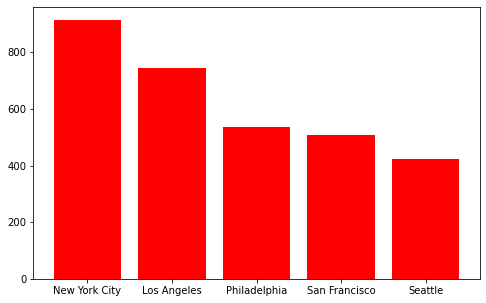

In [139]:
plt.figure(figsize=(8,5))
plt.bar(list(data['City'].value_counts()[0:5].keys()),list(data['City'].value_counts()[0:5]),color='r')
plt.show()

In [140]:

Only_profit = data[data['Profit']>=0]

<AxesSubplot:>

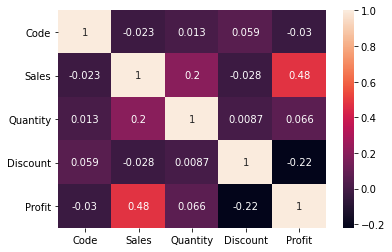

In [141]:

figure_1=data.corr()
sns.heatmap(figure_1,annot=True)

# We can analyse the data further in 3 different ways

<!-- 1)Sales ,Profit ,Discount Analysis at each Level -->
<!-- 2)Product Category Level Analysis -->
<!-- 3)Geographic Level Analysis -->



# a) Based on Region

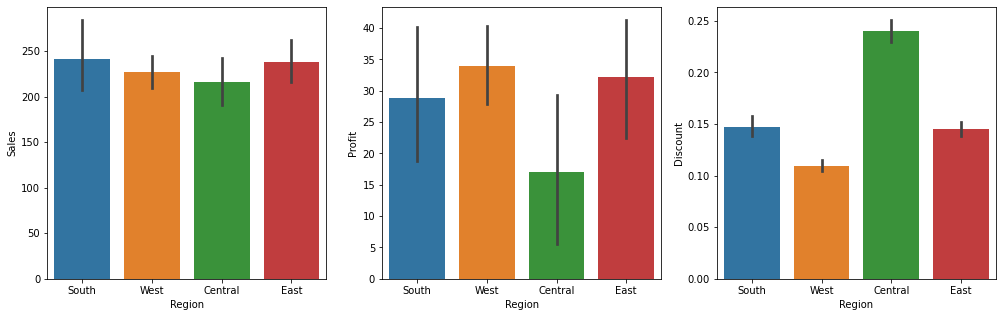

In [142]:
fig, ax =plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Region', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Region', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Region', y='Discount', data = data,ax=ax[2])
plt.show()

# b) Based on Category

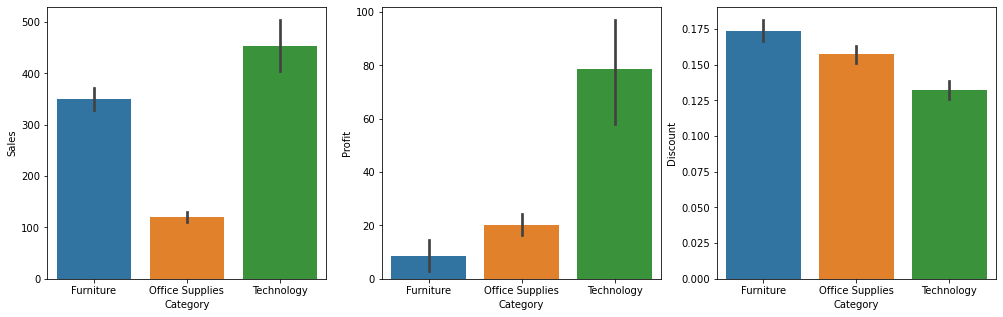

In [143]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Category', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Category', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Category', y='Discount', data = data,ax=ax[2])
plt.show()

# c) Based on Segement

<AxesSubplot:xlabel='Segment', ylabel='Discount'>

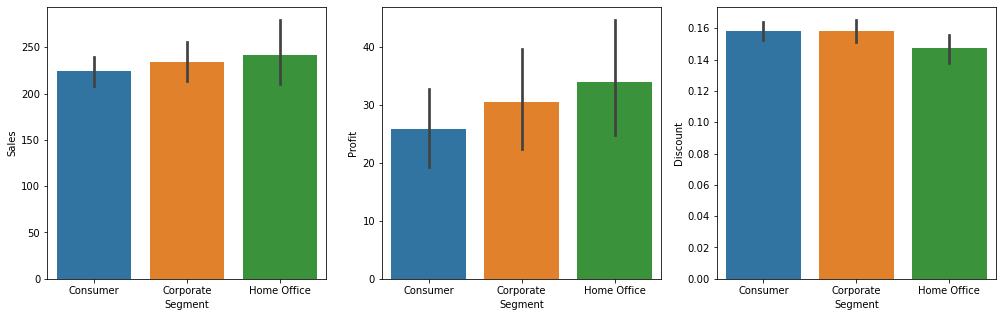

In [144]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Segment', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Segment', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Segment', y='Discount', data = data,ax=ax[2])

# d) Based on Ship mode

<AxesSubplot:xlabel='Ship Mode', ylabel='Discount'>

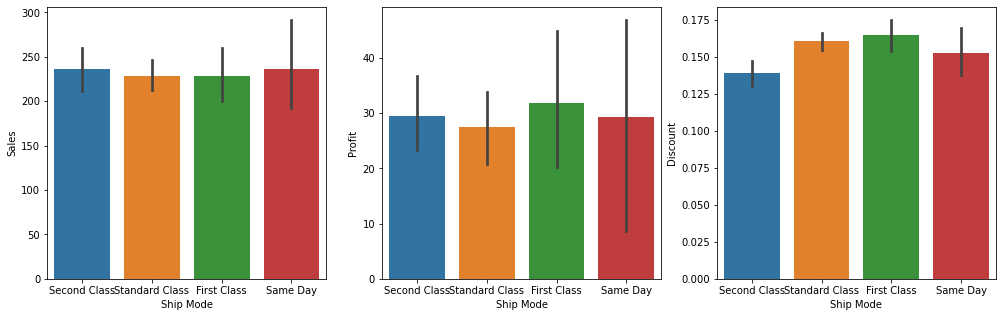

In [145]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Ship Mode', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Ship Mode', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Ship Mode', y='Discount', data = data,ax=ax[2])

# e) Based on Quantity -Sales & Profit & Discount

<AxesSubplot:xlabel='Quantity', ylabel='Discount'>

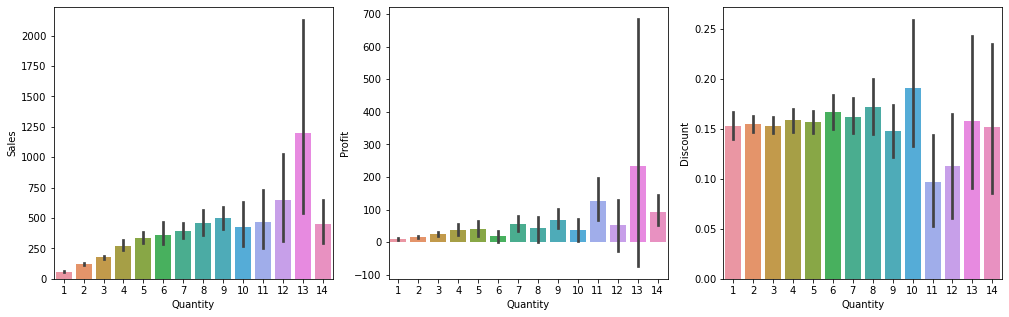

In [146]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Quantity', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Quantity', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Quantity', y='Discount', data = data,ax=ax[2])

# f) Based on Discount -Sales & Profit

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

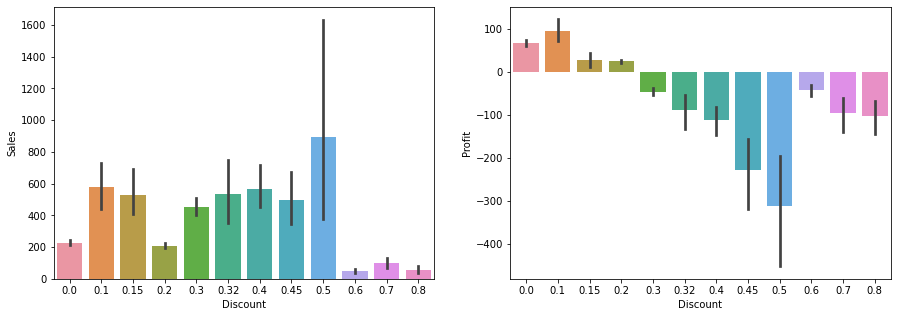

In [147]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Discount', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Discount', y='Profit', data = data)

# 2)Category Level Analysis

# a) Number of quantity in each Categor

C:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


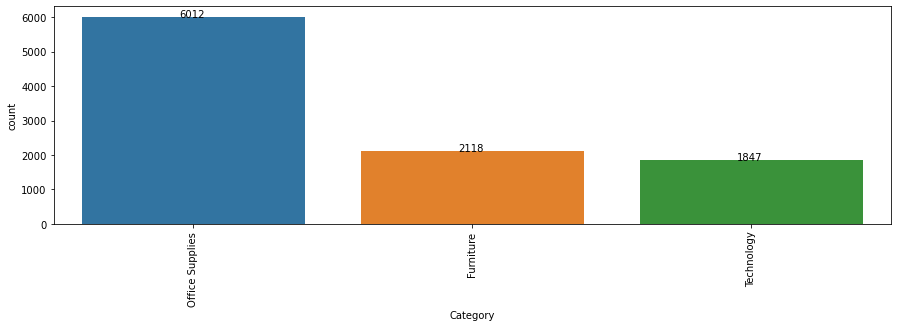

In [149]:
plt.figure(figsize=(15,4))
ax=sns.countplot("Category", data = data,order = data['Category'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

b)Total Sub-Categories by Percentage


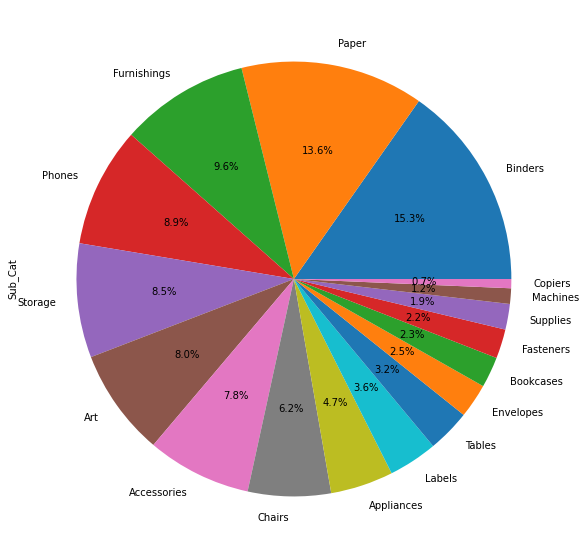

In [157]:
plt.figure(figsize=(10,10))
data['Sub_Cat'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<AxesSubplot:xlabel='Profit'>

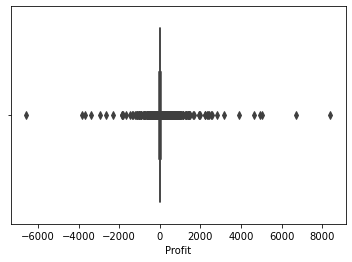

In [168]:
sns.boxplot(x=data['Profit'])

<AxesSubplot:xlabel='Sales'>

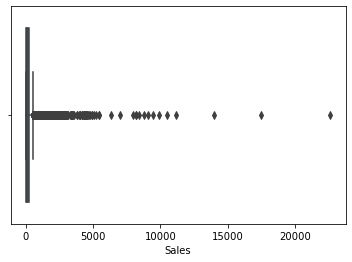

In [169]:
sns.boxplot(x=data['Sales'])


<AxesSubplot:xlabel='Discount'>

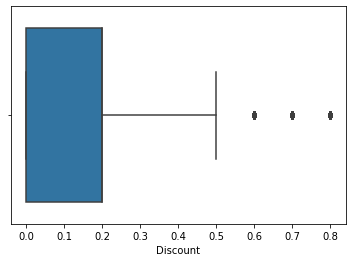

In [170]:
sns.boxplot(x=data['Discount'])


<AxesSubplot:xlabel='Quantity'>

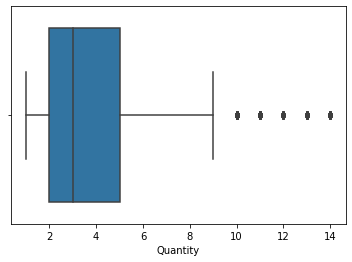

In [171]:
sns.boxplot(x=data['Quantity'])


In [172]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Code        66785.0000
Sales         192.6700
Quantity        3.0000
Discount        0.2000
Profit         27.6458
dtype: float64


,Code,Sales,Quantity,Discount,Profit
Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


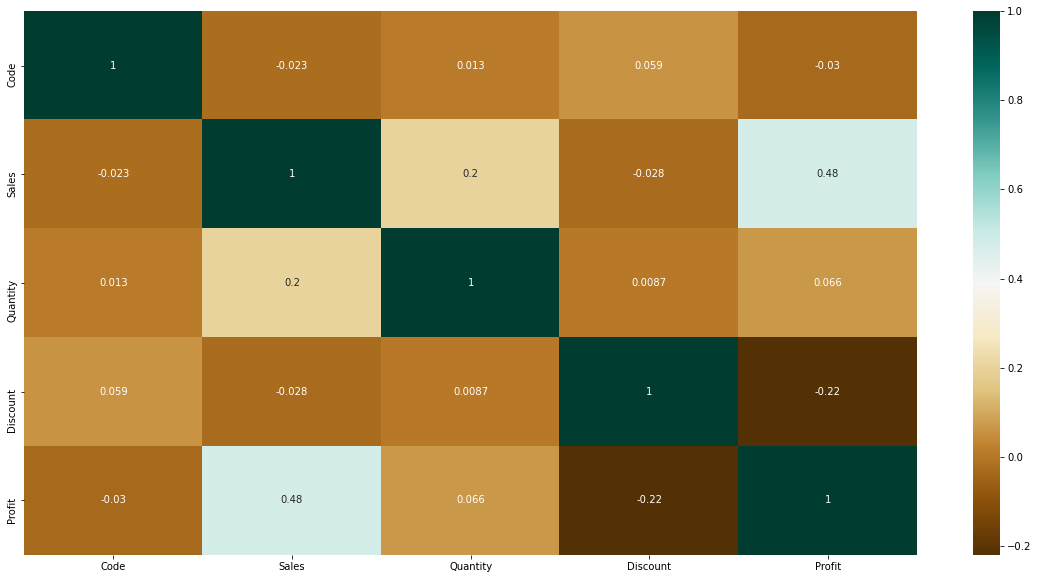

In [173]:
plt.figure(figsize=(20,10))
c =data.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

# Sales Vs Profit of top 10 states

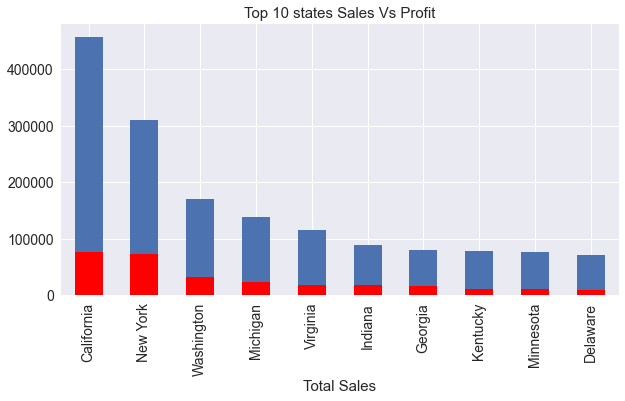

In [174]:
top_states_s = data.groupby("State").Sales.sum().nlargest(n=10)
top_states_p = data.groupby("State").Profit.sum().nlargest(n=10)
plt.style.use('seaborn')
top_states_s.plot(kind='bar',figsize=(10,5),fontsize=14)
top_states_p.plot(kind='bar',figsize=(10,5),fontsize=14,color='red')
plt.xlabel('States',fontsize=15)
plt.xlabel('Total Sales',fontsize=15)
plt.title("Top 10 states Sales Vs Profit", fontsize=15)
plt.show()

# SCATTERPLOT To find the correlation between two variables Sales and Profit.

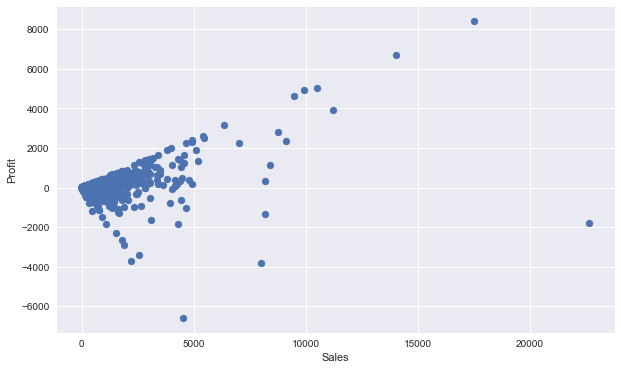

In [175]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['Sales'], data['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

# PAIRPLOT Pairplot of all the attributes of the dataset.

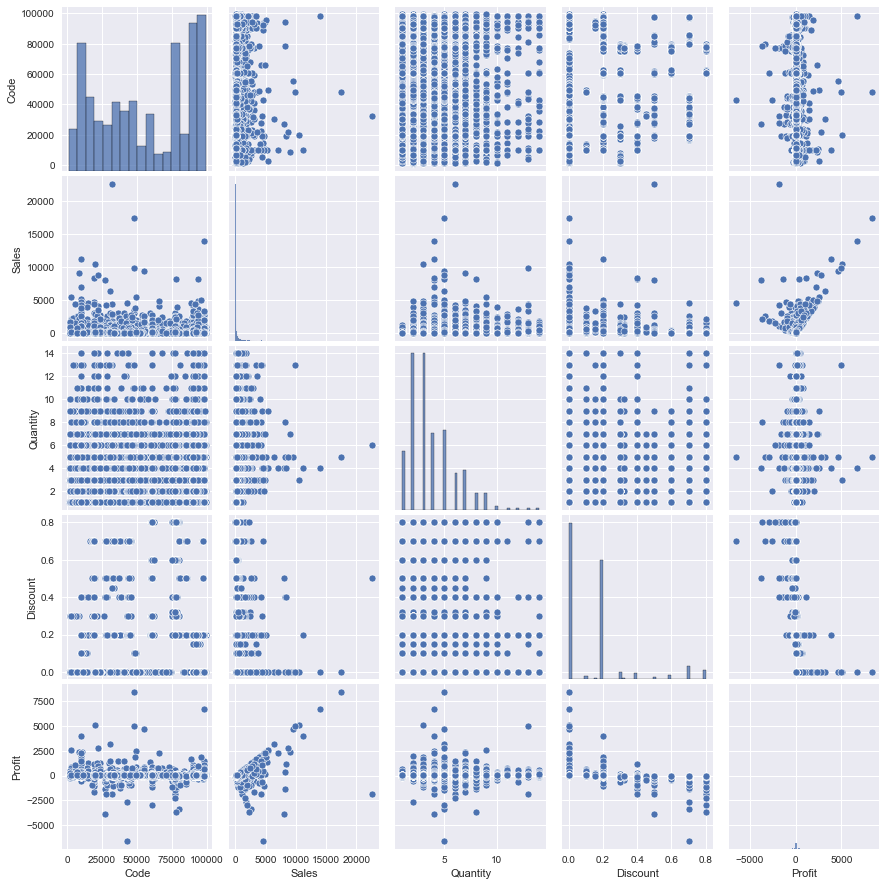

In [177]:
sns.pairplot(data)

In [ ]:
Conclusion

Increase sales more in New York york city, Los Angeles, Philadelphia, San Francisco, Seattle as profit is more there. Cities like Danbury, Champaign, Antioch, Missouri City,
Jefferson City are having a very low number of sales. Sub-Category of products like Paper, Binders, Art, Furnishings, Phones has the most number of sales and are profitable sub-categories of products. While sales of sub-categories like Binders, Chairs, Tables, Furnishings, Storage, etc should be reduced as they are having most number of sales but with a loss.
Predictive analytics can be used for decision-making and solving business problems, as well as identifying new market opportunities, enhancing customer experience, optimizing processes, reducing operational costs, and mitigating risk by predicting problems that may occur.